In [67]:
import pandas as pd
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()

In [75]:
list(map(int,np.linspace(10,90,10)))

[10, 18, 27, 36, 45, 54, 63, 72, 81, 90]

In [25]:
df_x = pd.DataFrame(iris.data,columns = iris.feature_names)

In [27]:
df_y = pd.DataFrame({'target':iris.target})

In [29]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.concat([df_x,df_y],axis=1)

In [54]:
data_corr = data.corr()

In [55]:
to_features = data_corr.index

<AxesSubplot:>

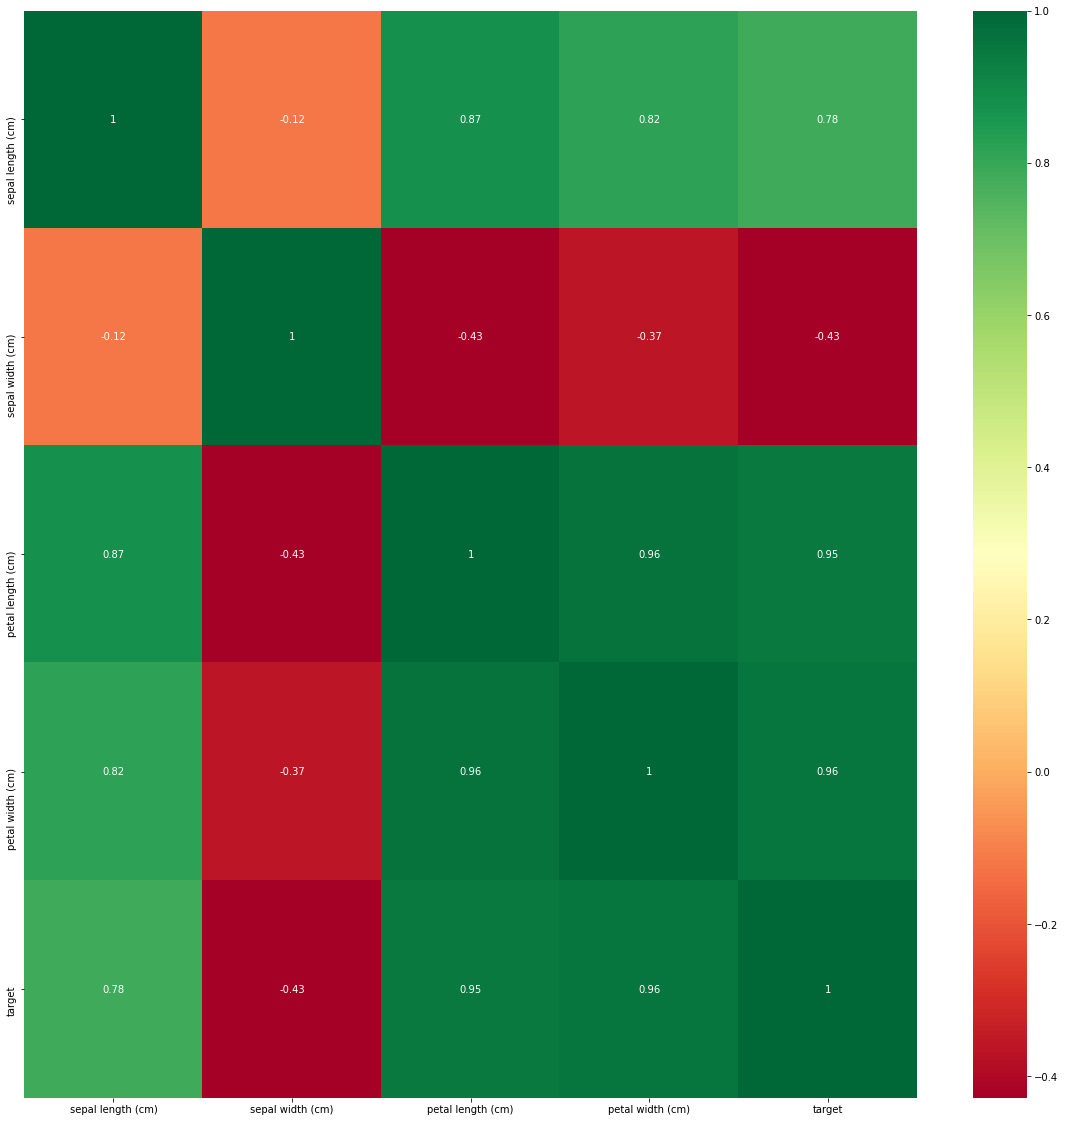

In [63]:
figure = plt.figure(figsize=[20,20])
sns.heatmap(data[to_features].corr(),annot = True,cmap='RdYlGn')

In [66]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [178]:
# logistic_regression
logistic_params = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
                  'C' : [100, 10, 1.0, 0.1, 0.01]}

xgboost_params = {'learning_rate':[0.1,0.15,0.2,0.25,0.3],
                 'max_depth' : [3,7,9,11,13,15],
                 'min_child_weight':[1,3,5,7,9],
                 'gamma':[0.1,0.2,0.25,0.3,0.4],
                 'Colsample_bytree':[0.2,0.3,0.4,0.6,0.7]}

dt_params = {'max_depth':list(map(int,np.linspace(1,32,32,endpoint=True))),
            'min_samples_split':[0.2,0.3,0.5,0.6,0.7],
            'min_samples_leaf':[0.2,0.3,0.4,0.5,0.6],
            'max_features':['auto','sqrt'],
            'criterion':['gini','entropy']}

rf_params = {'n_estimators':list(map(int,np.linspace(10,90,10))),
            'max_features':['auto','sqrt'],
            'max_depth':list(map(int,np.linspace(1,10,10))),
            'min_samples_split':[0.2,0.3,0.5,0.6,0.7],
            'min_samples_leaf':[0.2,0.3,0.4,0.5,0.6]}

gb_params = {'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
            'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
            'max_depth':list(map(int,np.linspace(1,10,10))),
           'min_samples_split':[0.2,0.3,0.5,0.6,0.7],
           'min_samples_leaf':[0.2,0.3,0.4,0.5,0.6],
            'max_features' : ['auto','sqrt']}

In [82]:
classifier1 = LogisticRegression()
classifier2 = DecisionTreeClassifier()
classifier3 = RandomForestClassifier()
classifier4 = GradientBoostingClassifier()
classifier5 = XGBClassifier()

In [85]:
random1 = RandomizedSearchCV(classifier1,param_distributions=logistic_params,n_jobs = -1,cv = 5,verbose = 3)


In [87]:
random1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.2s finished
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=3)

In [89]:
random1.best_estimator_

LogisticRegression(C=0.01, penalty='none')

In [90]:
from sklearn.model_selection import cross_val_score

In [141]:
cross_score1 = cross_val_score(LogisticRegression(C=0.01, penalty='none'),x_train,y_train,cv=10)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [93]:
cross_score

array([0.91666667, 1.        , 0.90909091, 1.        , 0.72727273,
       0.81818182, 1.        , 1.        , 1.        , 1.        ])

In [142]:
from collections import defaultdict
score = {}
score['LR']=[cross_score1.mean()]
score

{'LR': [0.9371212121212121]}

In [143]:
cross_score_test1 = cross_val_score(LogisticRegression(C=0.01, penalty='none'),x_test,y_test,cv=10)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [144]:
score['LR'].append(cross_score_test1.mean())

In [101]:
random2 = RandomizedSearchCV(classifier2,param_distributions=dt_params,n_jobs = -1,cv = 5,verbose = 3)

In [102]:
random2.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.8s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [0.2, 0.3, 0.4, 0.5,
                                                             0.6],
                                        'min_samples_split': [0.2, 0.3, 0.5,
                                                              0.6, 0.7]},
                   verbose=3)

In [104]:
random2.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features='auto', min_samples_leaf=0.3,
                       min_samples_split=0.5)

In [151]:
cross_score2 = cross_val_score(DecisionTreeClassifier(max_depth=2, max_features='auto', min_samples_leaf=0.3,
                       min_samples_split=0.5),x_train,y_train,cv=10)

In [152]:

score['DT'] = [cross_score2.mean()]

In [153]:
cross_score_test2 = cross_val_score(DecisionTreeClassifier(max_depth=2, max_features='auto', min_samples_leaf=0.3,
                       min_samples_split=0.5),x_test,y_test,cv=10)

In [154]:
score['DT'].append(cross_score_test2.mean())

In [155]:
score

{'LR': [0.9371212121212121, 0.975],
 'DT': [0.8643939393939393, 0.6583333333333334]}

In [156]:
random3 = RandomizedSearchCV(classifier3,param_distributions=rf_params,n_jobs = -1,cv = 5,verbose = 3)


In [157]:
random3.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.3s finished
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [0.2, 0.3, 0.4, 0.5,
                                                             0.6],
                                        'min_samples_split': [0.2, 0.3, 0.5,
                                                              0.6, 0.7],
                                        'n_estimators': [10, 18, 27, 36, 45, 54,
                                                         63, 72, 81, 90]},
                   verbose=3)

In [160]:
random3.best_estimator_

RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=0.3,
                       min_samples_split=0.6, n_estimators=18)

In [161]:
cross_score3 = cross_val_score(RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=0.3,
                       min_samples_split=0.6, n_estimators=18),x_train,y_train,cv=10)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\py

In [162]:
score['RF'] = [cross_score3.mean()]

In [163]:
cross_score_test3 = cross_val_score(RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=0.3,
                       min_samples_split=0.6, n_estimators=18),x_test,y_test,cv=10)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\py

In [167]:
score['RF'].append(cross_score_test3.mean())

In [181]:
random4 = RandomizedSearchCV(classifier5,param_distributions=xgboost_params,n_jobs = -1,cv = 5,verbose = 3)

In [183]:
random4.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[00:49:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { Colsample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:49:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [184]:
random4.best_estimator_

XGBClassifier(Colsample_bytree=0.4, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0.4, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=15, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [190]:
cross_score5 = cross_val_score(XGBClassifier(Colsample_bytree=0.4, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0.4, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=15, min_child_weight=3,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),x_train,y_train,cv = 10)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[00:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { Colsample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { Colsample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters 

In [192]:
cross_score5.mean()

0.928030303030303

In [193]:
cross_score_test5 = cross_val_score(XGBClassifier(Colsample_bytree=0.4, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0.4, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=15, min_child_weight=3,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),x_test,y_test,cv = 10)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[00:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { Colsample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { Colsample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters 

In [194]:
cross_score_test5.mean()

0.975